### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Athletics']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 6353     Athletics
6354     Athletics
6355     Athletics
6356     Athletics
6357     Athletics
           ...    
11751    Athletics
11752    Athletics
11753    Athletics
11754    Athletics
11755    Athletics
Name: Sport, Length: 5403, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 6353         NA
6354         NA
6355     Silver
6356         NA
6357         NA
          ...  
11751        NA
11752        NA
11753        NA
11754    Bronze
11755    Silver
Name: Medal, Length: 5403, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5403 entries, 6353 to 11755
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5403 non-null   int64  
 1   Unnamed: 0_x    5403 non-null   int64  
 2   ID              5403 non-null   int64  
 3   Name            5403 non-null   object 
 4   Sex             5403 non-null   object 
 5   Age             5403 non-null   float64
 6   Height          5403 non-null   float64
 7   Weight          5403 non-null   float64
 8   NOC             5403 non-null   object 
 9   Games           5403 non-null   object 
 10  Year            5403 non-null   int64  
 11  Season          5403 non-null   object 
 12  City            5403 non-null   object 
 13  Sport           5403 non-null   object 
 14  Event           5403 non-null   object 
 15  Medal           5403 non-null   object 
 16  Team            5403 non-null   object 
 17  Unnamed: 0_y    5403 non-null

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4052, 1) (4052, 6)
Test Set  : (1351, 1) (1351, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
7835,31.0,51.0,165.0,5.140000e+11,9903122.0,51902.824180,NA
8342,25.0,68.0,180.0,2.120000e+12,62704897.0,33809.161667,NA
9681,22.0,58.0,169.0,1.200000e+12,24127159.0,49736.481614,NA
11318,20.0,39.0,154.0,4.940000e+12,126994511.0,38899.319042,NA
7418,20.0,49.0,165.0,1.800000e+12,207652865.0,8668.312860,NA
...,...,...,...,...,...,...,...
8751,28.0,68.0,185.0,5.140000e+11,9903122.0,51902.824180,NA
10081,35.0,43.0,160.0,5.910000e+11,144067054.0,4102.256440,NA
8931,20.0,60.0,174.0,2.820000e+12,82516260.0,34175.082584,NA
11471,27.0,55.0,170.0,1.060000e+12,21249200.0,49884.230936,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        4940
Silver     160
Gold       154
Bronze     149
Name: Medal, dtype: int64


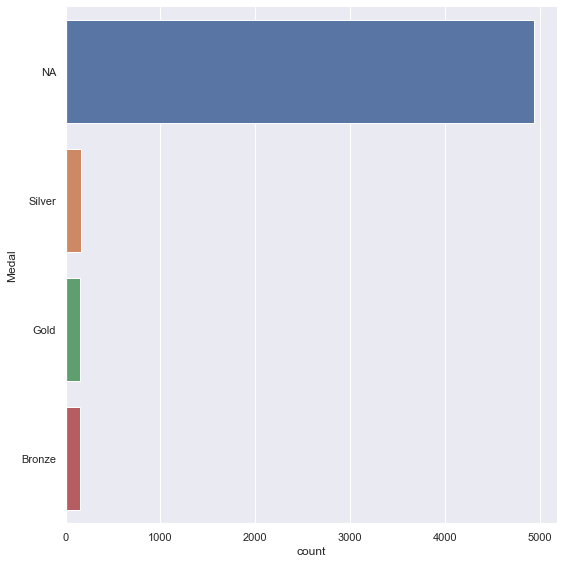

In [14]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(4052, 6) (4052, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(14804, 6) (14804, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,31.000000,51.000000,165.000000,5.140000e+11,9.903122e+06,51902.824180,NA
1,25.000000,68.000000,180.000000,2.120000e+12,6.270490e+07,33809.161667,NA
2,22.000000,58.000000,169.000000,1.200000e+12,2.412716e+07,49736.481614,NA
3,20.000000,39.000000,154.000000,4.940000e+12,1.269945e+08,38899.319042,NA
4,20.000000,49.000000,165.000000,1.800000e+12,2.076529e+08,8668.312860,NA
...,...,...,...,...,...,...,...
14799,21.835269,64.164731,169.670539,1.374092e+10,2.805151e+06,4898.569003,Silver
14800,28.403362,55.285713,167.386553,7.564292e+10,2.417543e+07,3341.405175,Silver
14801,24.152551,51.000000,161.816412,4.590459e+10,8.236287e+07,1727.487664,Silver
14802,34.340238,98.680476,187.323667,2.536929e+11,1.015701e+08,8487.388911,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
8374,22.0,42.0,157.0,4.890000e+12,126843000.0,38551.595279
6483,35.0,62.0,173.0,5.452658e+10,32955496.0,1654.551952
7571,38.0,62.0,170.0,3.070000e+11,5731118.0,53567.209749
9065,27.0,60.0,173.0,5.910000e+11,144067054.0,4102.256440
8198,28.0,125.0,183.0,1.230000e+13,292805298.0,42007.436628
...,...,...,...,...,...,...
8324,30.0,47.0,159.0,3.470000e+09,22570224.0,153.742382
9948,27.0,52.0,159.0,7.700000e+11,106995583.0,7196.558759
10674,32.0,63.0,168.0,5.743551e+10,4857274.0,11824.638102
7015,19.0,48.0,166.0,8.740000e+11,74569867.0,11720.551949


Number of Medal Types : 4
Bronze    3701
Gold      3701
NA        3701
Silver    3701
Name: Medal, dtype: int64


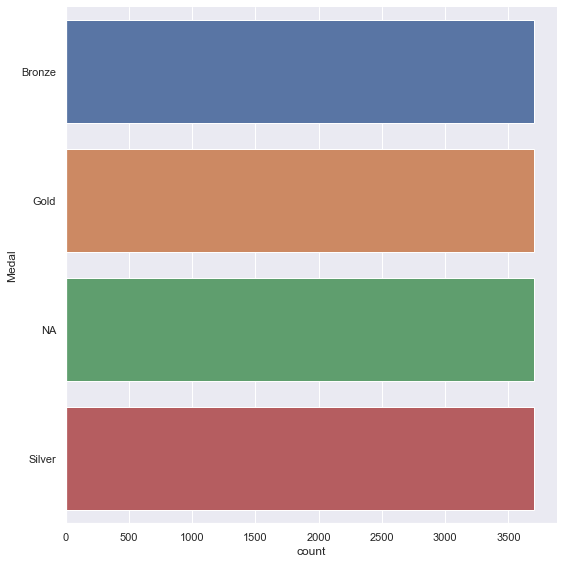

In [19]:
# Medal Types in the Dataset# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (11103, 1) (11103, 6)
Test Set  : (3701, 1) (3701, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8478789516346933

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8030262091326669



<AxesSubplot:>

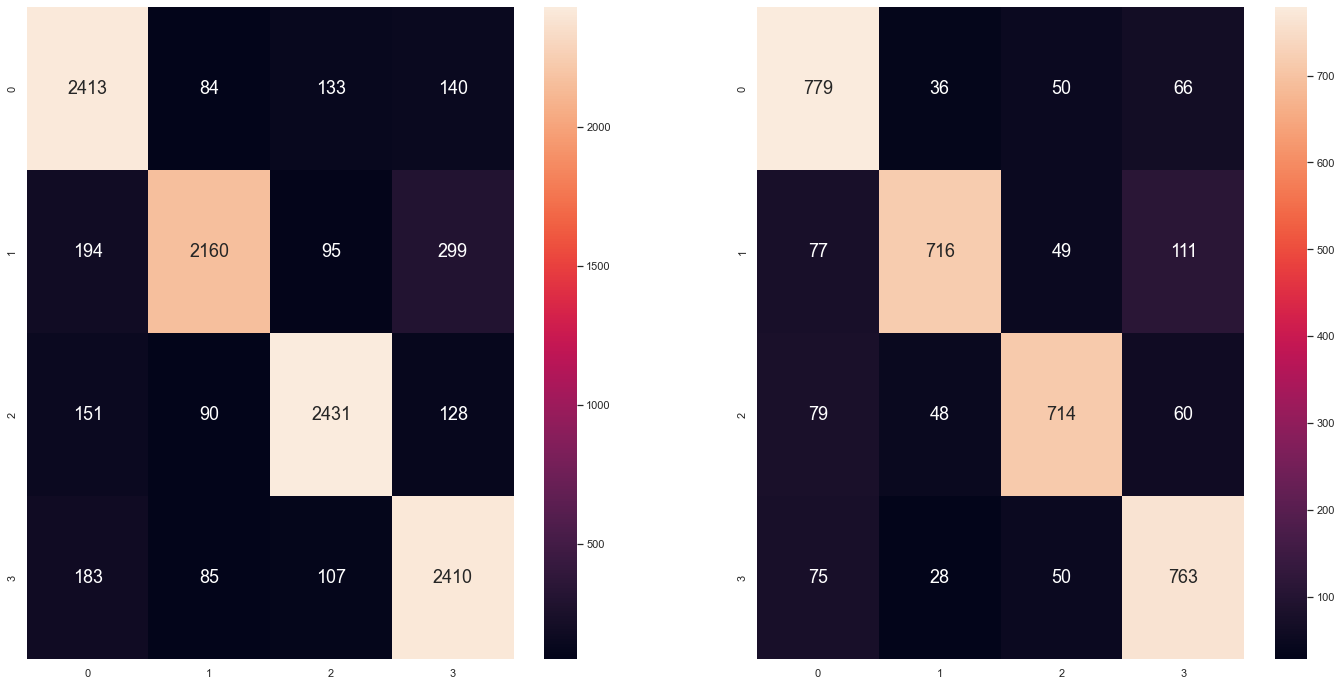

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

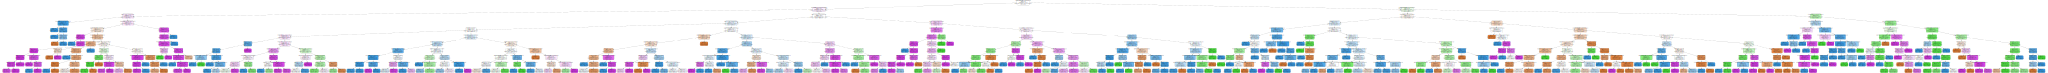

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_swim")

'Tree_female_swim.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7809030347890451


<AxesSubplot:>

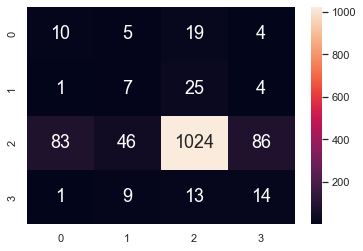

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})